# Exploratory Notebook

Use this notebook to explore the project data using `pandas`, SQL, and Matplotlib!

You will not be submitting this notebook so feel free to try out different "experiments" to figure out what works best.

When you're happy with your code and want to turn it in, copy it into the `final.ipynb` notebook and download that notebook for the PDF submission.

## CSV and TSV Data

Here is some starter code that opens up some of the CSV and TSV data and loads it into DataFrames:

# OVERVIEW
## Business Understanding
Three recomendations for Microsoft for movie production studio debut
Microsoft well known tech company is expanging into the film industry
They would like to know what makes a high grossing movie

## I am Scharmaine Chappell
I am a data analyst of so many years with a focus in ...

## Overview
What we'll do is coordinate internet sourced data from popular movie databases sites
in order to show that ...
is our reasons for recommending Microsoft consider ... 
as key aspects when chosing and producing their first movie

## Data Description
Our data is gathered from the popular sites ... and ...
I have chosen ... numbers to create a singular database file to help us see why ... factors should be considered
The specific details I curated into the singular database will be discussed as we go into detail of what's mesuared and
how we use it to address the needs of Microsoft Studios

## Argument
The First measurement we use is production costs/budgets vs total gross values. Total gross includes domestic and beyond gross revenues per film.

On this alone we can see that ... genre(s) have remained the highest revenue producing across borders and throughout the centuries. Compared to this(these) genre(s), others such as ... do(n't) compare. The next highest revenue producing genre(s) is/are...

Let's see how these genres fair when we compare their total gross valuses to the ratings, director(s), release dates and runtimes.

When in comes to release dates, we want to discern if they holidays really do make a difference. With this aspect, we will only be reviewing domestic holiday release dates, as I am more familiar with those. This will help in discerning if there is a specific time of year or holiday that would be best to debut your first release.


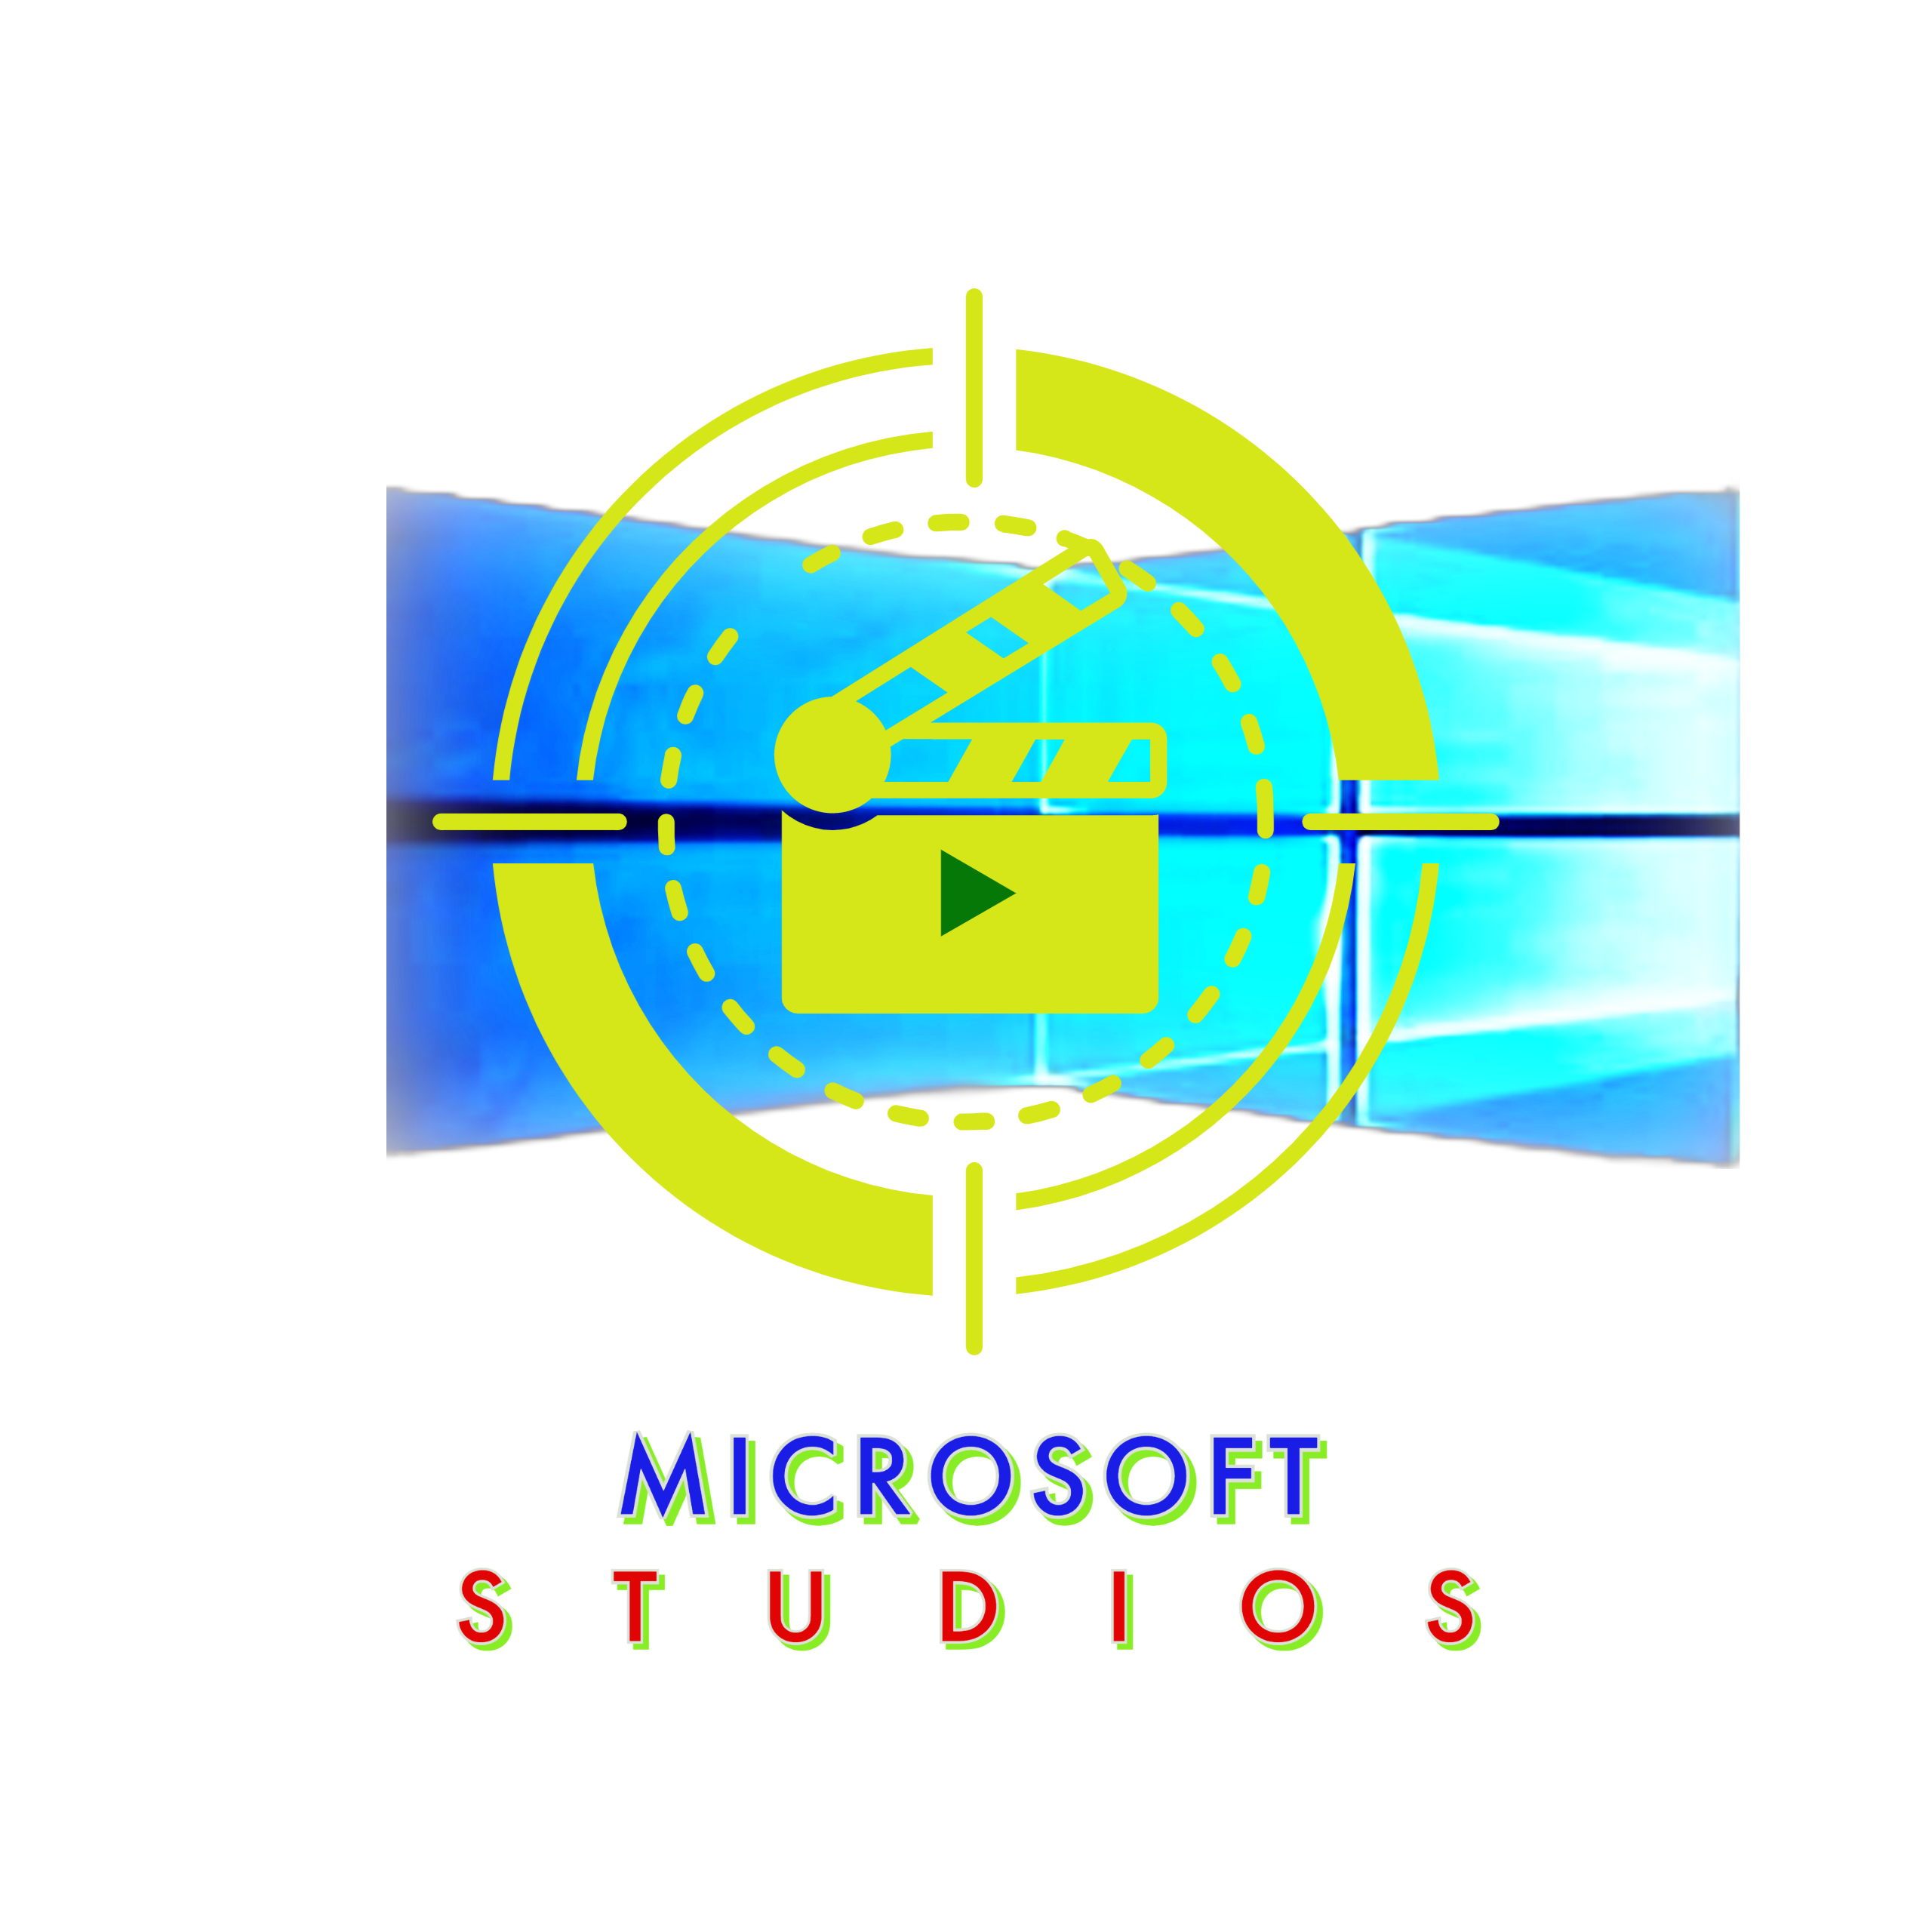

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import string

In [2]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Adding for total gross in bom_movie_gross

In [3]:
#bom_movie_gross.info()
#type ('foreign_gross')

In [32]:
#remove punctuation from foreign_gross
punctuation = string.punctuation
foreign_gross_cleaned =[]

for fg in 'foreign_gross':
    
    fgross = fg.strip(",.")
    
    
bom_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     2004 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [33]:
#reformat foreign_gross into type float
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors = 'coerce')
bom_movie_gross.info()
#bom_movie_gross.foreign_gross.value_counts()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     2004 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [34]:
type(bom_movie_gross.foreign_gross[0])

numpy.float64

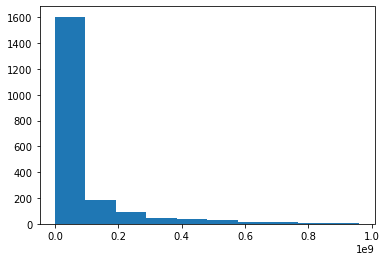

In [35]:
#data vis pt1
plt.hist(bom_movie_gross['foreign_gross']);

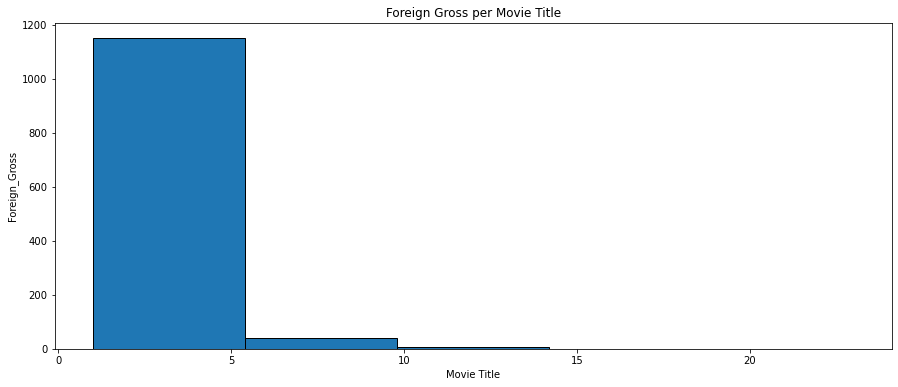

In [36]:
#import data
x = bom_movie_gross.foreign_gross.value_counts()
# create table
fig, ax = plt.subplots(figsize=(15,6))
#plot table
ax.hist(x, bins=5, edgecolor= 'black')
#create labels and title
ax.set_title('Foreign Gross per Movie Title')
ax.set_xlabel("Movie Title")
ax.set_ylabel("Foreign_Gross");

In [37]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']
#bom_movie_gross.info()
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


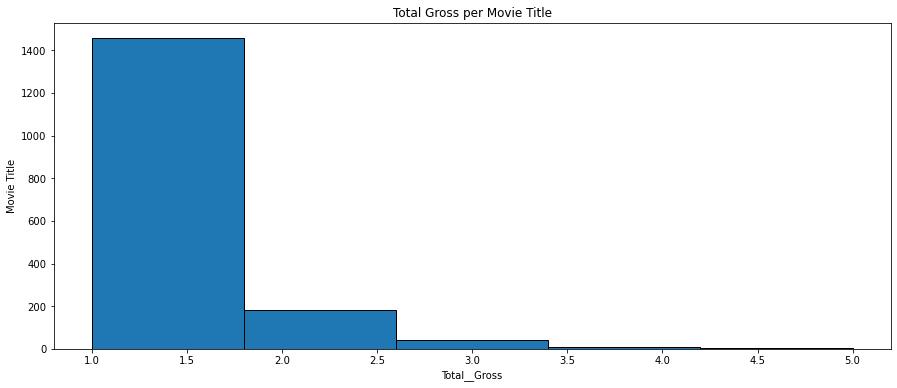

In [47]:
#import data
y = bom_movie_gross.total_gross.value_counts()
# create table
fig, ax = plt.subplots(figsize=(15,6))
#plot table
ax.hist(y, bins=5, edgecolor= 'black')
#create labels and title and ticks
ax.set_title('Total Gross per Movie Title')

ax.set_ylabel("Movie Title")
ax.set_xlabel("Total__Gross");

In [22]:
#working_bom_gross
bom_movie_gross['foreign_gross'].mean()

75057041.62549213

In [23]:
bom_movie_gross['foreign_gross'].median()

18900000.0

In [24]:
bom_movie_gross['foreign_gross'].mode()

0    1200000.0
dtype: float64

In [59]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie_info
#over 5 columns decided to just show their names first

rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [61]:
#error to check 'UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 6558: invalid start byte'
#not finding a way to resolve at the moment so will move forward
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter="\t", encoding = "latin1")
rt_reviews
rt_reviews.head(10)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [73]:
counts = rt_reviews['id'].value_counts()

In [6]:
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb_movies

#tmdb_movies.info()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [68]:
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
#tn_movie_budgets
#tn_movie_budgets.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [71]:
counts = tn_movie_budgets['movie'].value_counts()

This does not include all of the CSVs! Make sure you open and explore some of the other ones.

## SQL Data

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [63]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


Then here is some starter code that reads one of the data tables from the database:

In [64]:
import sqlite3

In [65]:
conn = sqlite3.connect("im.db")

In [66]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
#movie_basics
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# CREATE ONE DATABASE TABLE
Combine tables using the Genre, Release Date, Budget and Total Gross Key/Variables

# NOTES
So far I have been able to change the data type of the foreign gross values in BOM from object float by using .numeric(), I also created a new column

Issue: I was able to sum the domestic and foreign gross values, but it shows as an exponential expression instead of in USD.

Issue: If using ID info to be able to create  one table, maybe .explode() will work for the IDs in addition to the movies with multiple genres

Possible columns: Movie ID/Title; Rating; Director; Total Gross; Release Date; Runtime 

Create tables with desired Key:Values out from each database

Chose which Key:Value(s) to use for joining tables into one table

Issue: Missing values. Use histogram to decide whether median or mean value would be best as stand-in value for data set, if needed.

Issue: Not liking previously mentioned foreign gross histogram plotted.


Issue: Not sure if can save PDF, slides do not have 365, will have to figure out how to add photos, videos 





# EXTRACT TRANSFORM LOAD(ETL)
Extract only desired data from dataset to create new table

## Your Data Analysis Here


At the end, it is always a best practice to close the connection to the database.

In [ ]:
conn.close()